In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../../Datasets/insurance_dataset.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.rename({'sex':'gender'},inplace=True,axis=1)

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
gen = df['gender'].value_counts()
gen

male      676
female    662
Name: gender, dtype: int64

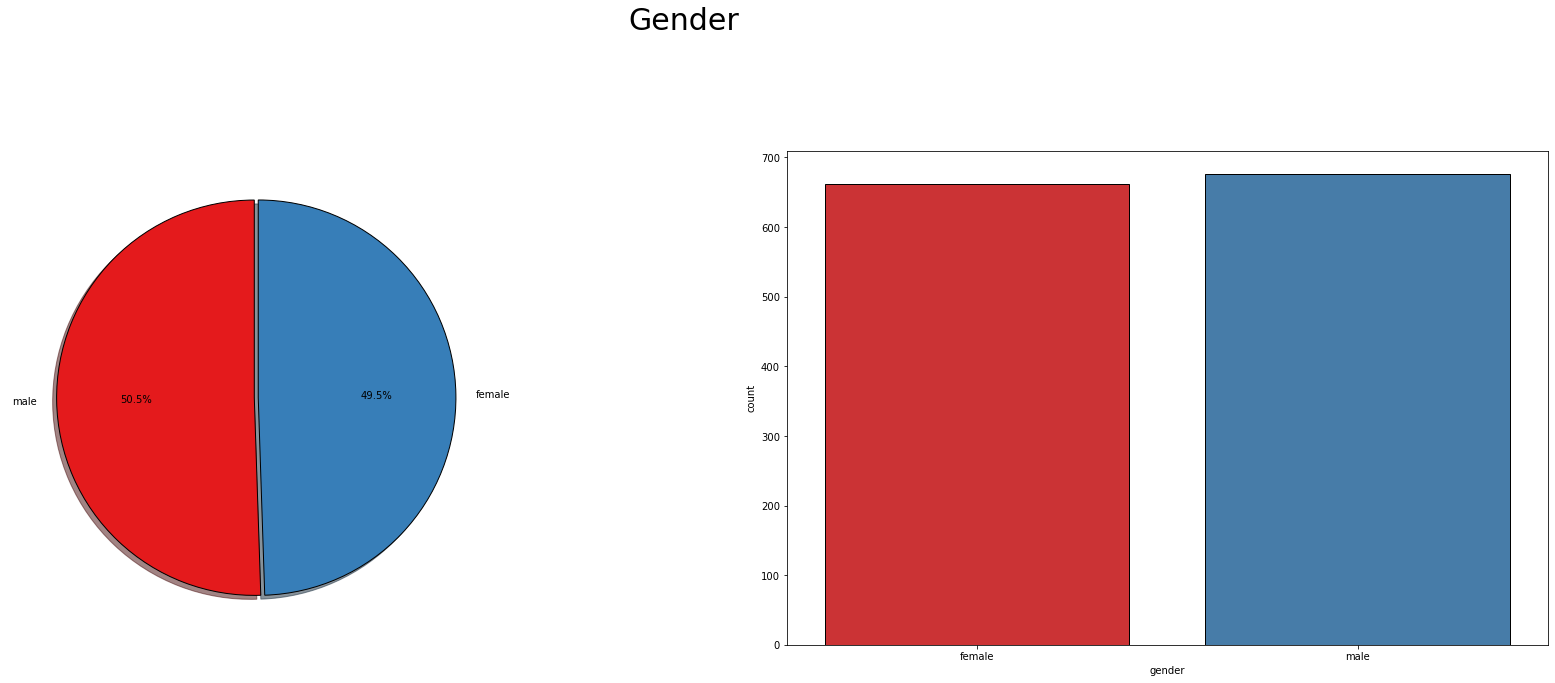

In [8]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.pie(x=gen,labels=['male','female'],explode=[0,0.02],wedgeprops={'edgecolor':'black'},shadow=True,autopct="%1.1f%%",colors=sns.color_palette("Set1"),startangle=90)
plt.subplot(2,2,2)
sns.countplot(x=df.gender,palette='Set1',edgecolor='black')
plt.suptitle('Gender',fontsize=30)
plt.show()

In [9]:
smoke = df['smoker'].value_counts()
smoke

no     1064
yes     274
Name: smoker, dtype: int64

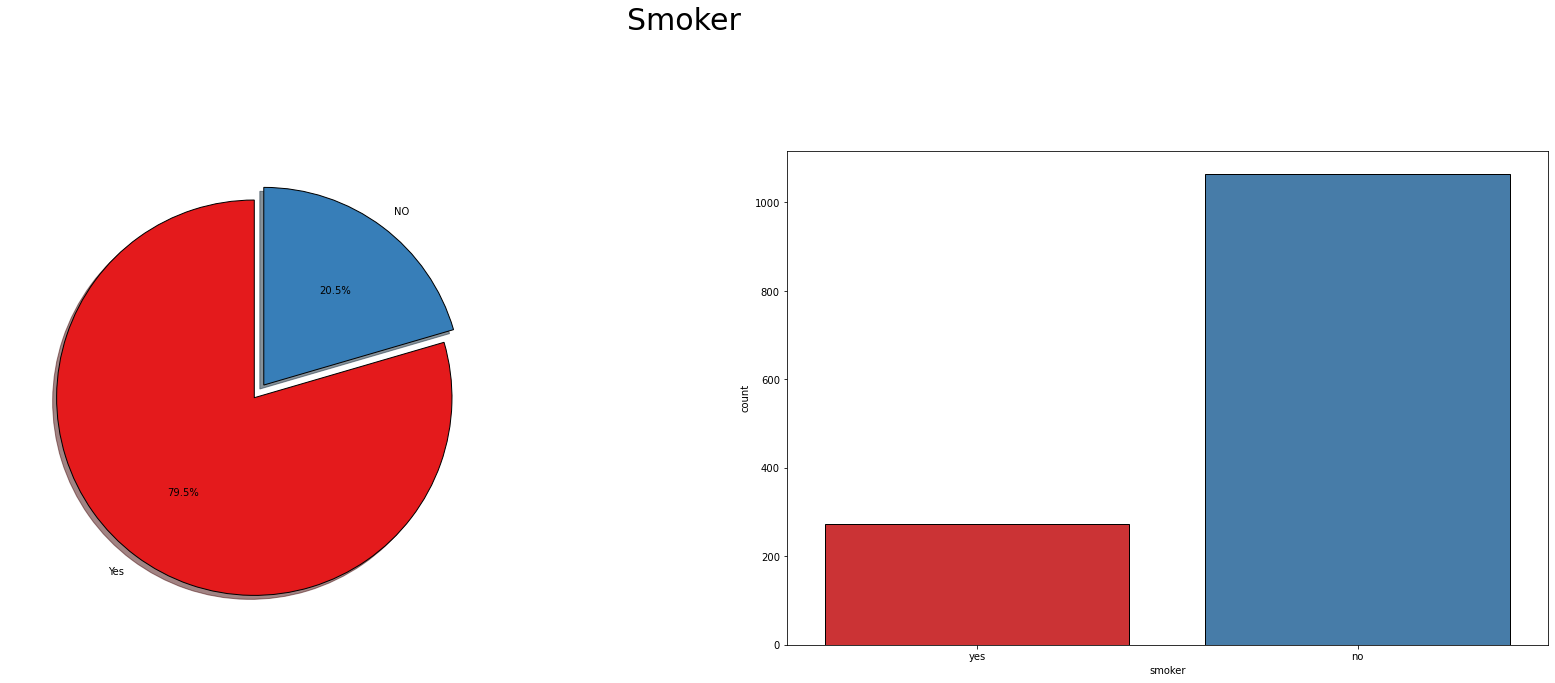

In [10]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.pie(x=smoke,labels=['Yes','NO'],explode=[0,0.08],wedgeprops={'edgecolor':'black'},shadow=True,autopct="%1.1f%%",colors=sns.color_palette("Set1"),startangle=90)
plt.subplot(2,2,2)
sns.countplot(x=df.smoker,palette='Set1',edgecolor='black')
plt.suptitle('Smoker',fontsize=30)
plt.show()

In [11]:
regions = df['region'].value_counts()
regions

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

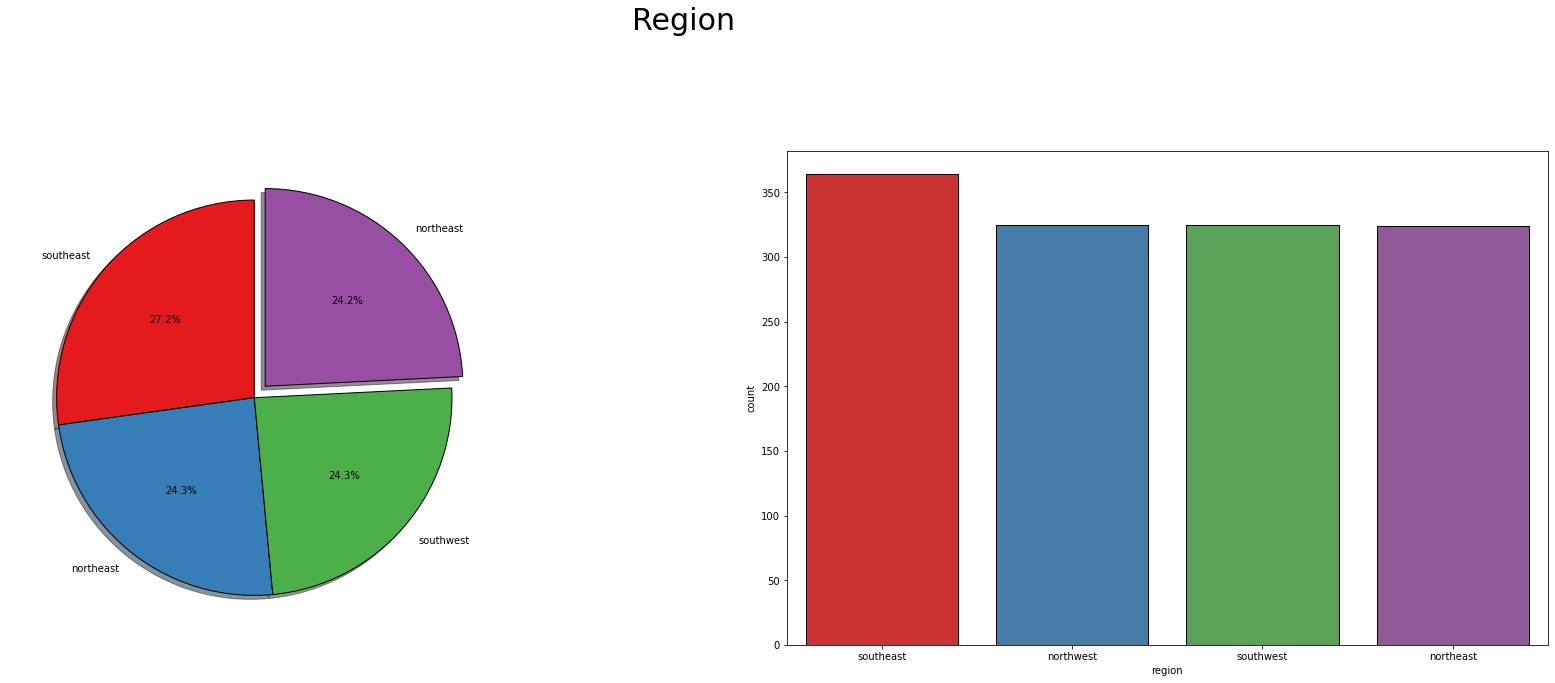

In [12]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.pie(x=regions,labels=['southeast','northeast','southwest','northeast'],explode=[0,0,0,0.08],wedgeprops={'edgecolor':'black'},shadow=True,autopct="%1.1f%%",colors=sns.color_palette("Set1"),startangle=90)
plt.subplot(2,2,2)
sns.countplot(x=df.region,palette='Set1',edgecolor='black',order=regions.index)
plt.suptitle('Region',fontsize=30)
plt.show()

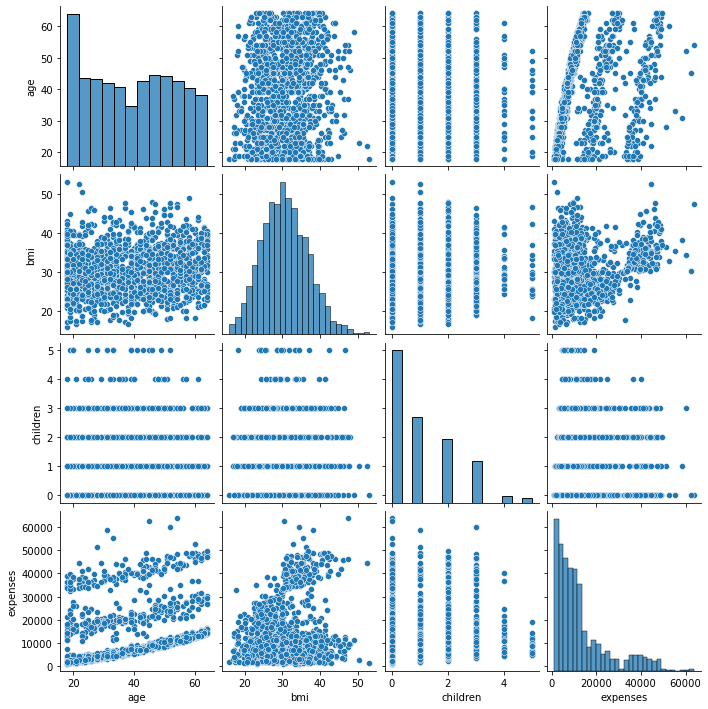

In [13]:
sns.pairplot(df)

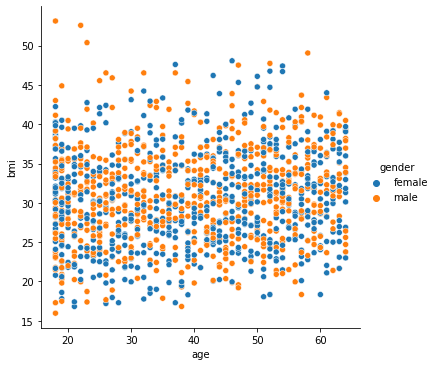

In [14]:
sns.relplot(x=df.age,y=df.bmi,hue=df.gender)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

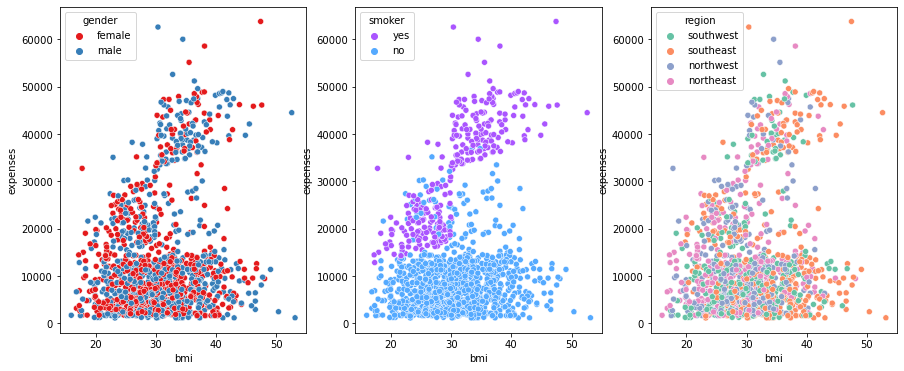

In [15]:
palette=['Set1','cool_r','Set2']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=df,hue='gender', palette=palette[0])
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=df,hue='smoker', palette=palette[1])
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=df,hue='region',palette=palette[2])

<AxesSubplot:xlabel='age', ylabel='expenses'>

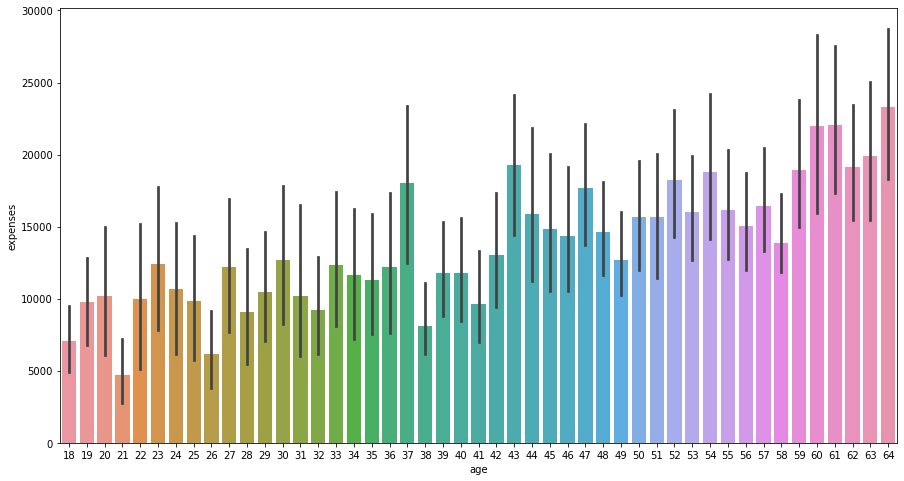

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['age'], y=df['expenses'])

In [17]:
df.head(5)

,age,gender,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
x = pd.get_dummies(df[['gender','smoker','region']],drop_first=True)
x

,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [19]:
data = pd.concat((df,x),axis=1)
data

,age,gender,bmi,children,smoker,region,expenses,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


In [20]:
data.drop(columns=['gender','smoker','region'],inplace=True)

<AxesSubplot:>

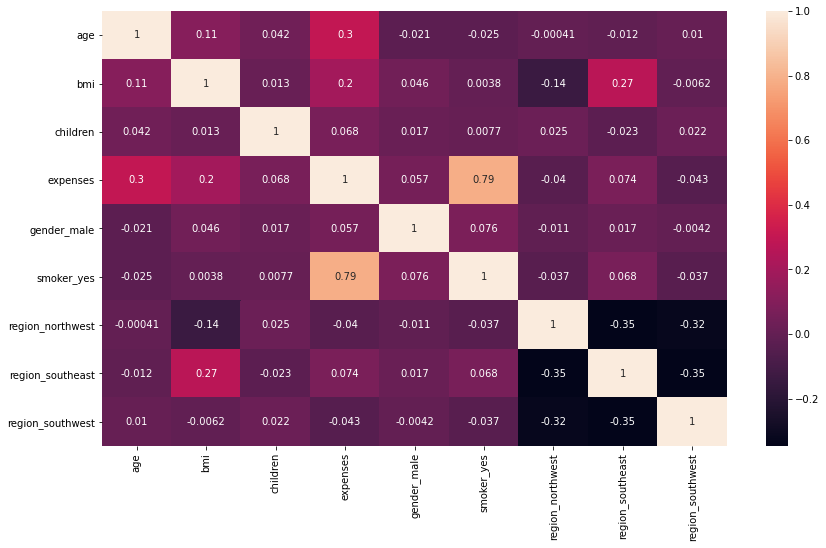

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)

In [22]:
x = data.drop(columns='expenses')
y = data['expenses']

<AxesSubplot:>

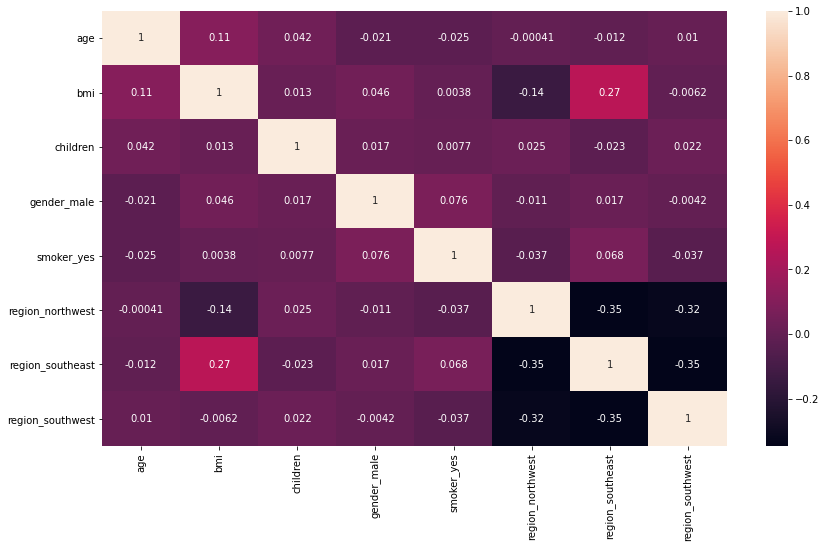

In [23]:
plt.figure(figsize=(14,8))
sns.heatmap(x.corr(),annot=True)

<AxesSubplot:>

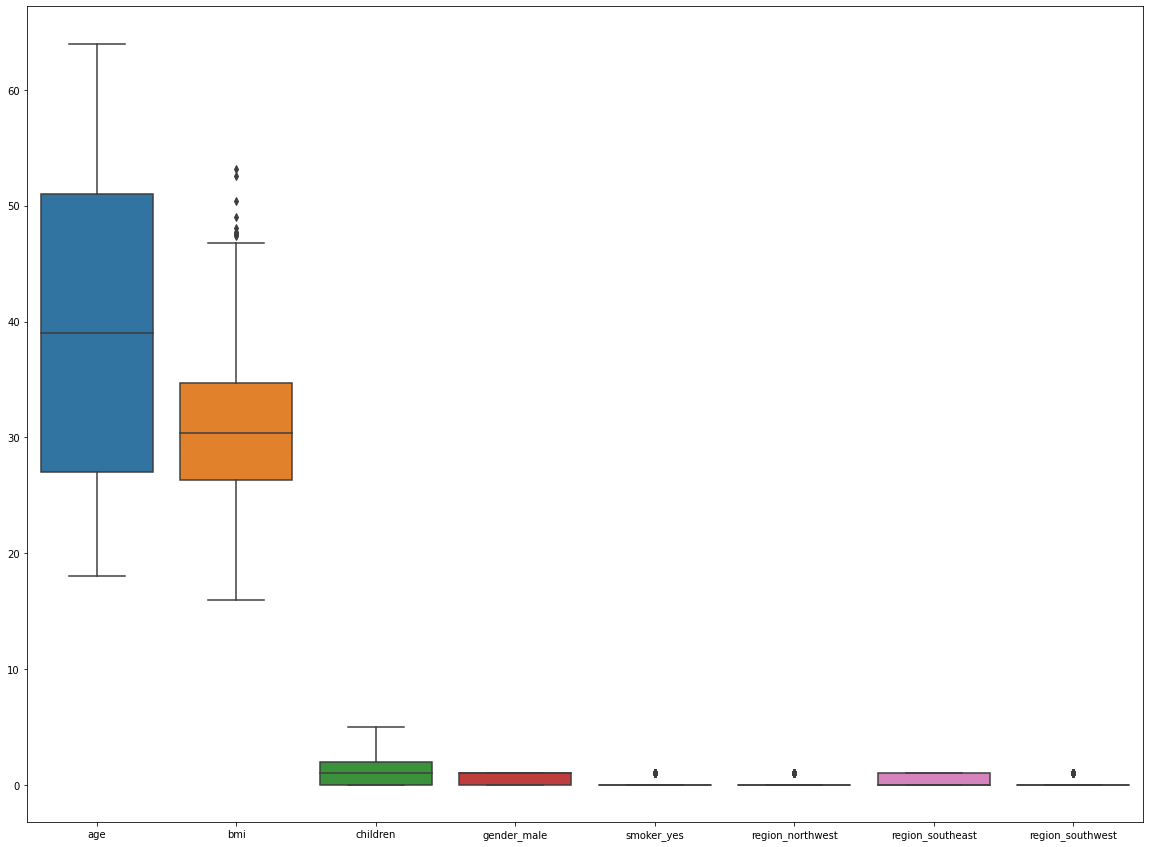

In [24]:
plt.figure(figsize=(20,15))
sns.boxplot(data=x)

## Thank you for visting our repository.
## The Application link is mentioned below:-
🔗 https://dirgh-aayusha.herokuapp.com/